In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os


np.set_printoptions(precision=3,suppress=True)

In [2]:
# Aufgabe 1
# Daten
points_size = 100
num_iters = 400
alpha = 0.01
J_history = np.zeros((num_iters, 1))

x_1 = np.random.uniform(0, 50, points_size)
x_2 = np.random.uniform(0, 50, points_size)
X = np.column_stack((x_1, x_2))
m = len(X)
X_norm = np.append(np.ones((m,1)), X, axis=1)
print("X_norm till 10: ", X_norm[:10])



theta = np.transpose(np.array([1.1, 2.0, 9]))
print("theta: ", theta)

X_norm till 10:  [[ 1.     4.298 39.883]
 [ 1.    47.451  3.462]
 [ 1.    41.381 15.606]
 [ 1.    48.082 40.411]
 [ 1.    24.579 37.782]
 [ 1.    36.923 38.481]
 [ 1.    27.023 37.615]
 [ 1.    43.057  5.962]
 [ 1.    34.701 18.208]
 [ 1.    47.39   2.838]]
theta:  [1.1 2.  9. ]


In [3]:
# Aufgabe 2
def linear_hypothesis(theta):
    def h(X):
        z = np.array([])
        for i in range(len(X_norm)):
            y = np.dot(np.transpose(theta), X_norm[i,:])
            z = np.append(z, y, None)
        return z
    return h

In [4]:
# Aufgabe 3
# a) Y
h = linear_hypothesis(theta)
y_pure = h(X_norm)
Y = y_pure + np.random.uniform(0, 10, points_size)
print("Y till 10: ", Y[:10])

Y till 10:  [375.562 133.798 228.954 464.518 398.276 425.345 396.176 142.512 239.605
 124.468]


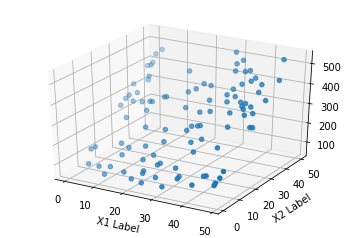

In [5]:
# b) Plotten ohne Scaling
fig = plt.figure("b")
ax = fig.gca(projection='3d')
ax.scatter(xs = X_norm[:,1], ys = X_norm[:,2], zs = Y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.show()

In [6]:
# c) Feature scaling
# create array's of zeros for mean and standart deviation
X_norm = X
mu = np.zeros((1,np.size(X[:1])))
sigma = np.zeros((1,np.size(X[:1])))
# Normalize X data
for i in range(np.size(mu)):
    # Identify mean value for each dimension/column
    mu[:,i] = np.mean(X[:,i])
    # Identify standard deviation value for each dimension/column
    sigma[:,i] = np.std(X[:,i])
    # Set X_norm equal to the X normalized value ((value-meanValue)/standardDeviation)
    X_norm[:,i] = (X[:,i]-mu[:,i])/sigma[:,i]

In [7]:
# Print mit Scaling
X_norm = np.append(np.ones((m,1)), X_norm, axis=1)
print("X_norm till 10: ", X_norm[:10])

X_norm till 10:  [[ 1.    -1.411  1.068]
 [ 1.     1.441 -1.507]
 [ 1.     1.04  -0.649]
 [ 1.     1.483  1.105]
 [ 1.    -0.07   0.919]
 [ 1.     0.745  0.968]
 [ 1.     0.091  0.907]
 [ 1.     1.151 -1.331]
 [ 1.     0.599 -0.465]
 [ 1.     1.437 -1.551]]


In [8]:
# Aufgabe 4
def cost_function(X_norm, y):
    def j(theta):
        J_cost = 0
        for j in range(m):
            J_cost = J_cost + ((1/(2*m))*np.square(np.dot(np.transpose(theta),np.transpose(X_norm[j,:]))-y[j]))
        return J_cost
    return j

In [9]:
# Aufgabe 5
# a)
def compute_new_theta (X_norm, Y, theta, alpha):
    h = linear_hypothesis(theta)
    theta_temp = theta - np.dot(np.transpose(X_norm), h(X_norm) - Y)*(alpha/m)
    return theta_temp

In [10]:
# b), c)
def gradient_descent(alpha, theta, X_norm, Y):
    for i in range(num_iters):
        theta = compute_new_theta(X_norm, Y, theta, alpha)
        for j in range(m):
            j = cost_function(X_norm, Y)
            J_cost = j(theta)
            J_history[i] = J_cost
    return J_history, theta

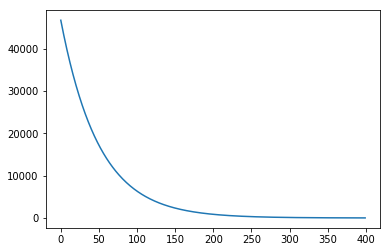

In [11]:
# Kosten plotten
theta_test = np.transpose(np.array([0, 0, 0]))
J_history, theta_result = gradient_descent(alpha, theta_test, X_norm, Y)
plt.plot(J_history)

In [12]:
# test Before/After
print("Y_before till 10: ", Y[:10])
h = linear_hypothesis(theta_result)
Y_after = h(X_norm)
print("Y_after_gradient_descent till 10: ", Y_after[:10])

# test Normal equation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.c_[X_norm[:,0], X_norm[:, 1], Y]
X = X_norm
y = data[:,2]
xTx = X.T.dot(X)
XtX = np.linalg.inv(xTx)
XtX_xT = XtX.dot(X.T)
theta_normal = XtX_xT.dot(y)
h = linear_hypothesis(theta_normal)
Y_after_normal = h(X_norm)
print("Y_after_normal_equation till 10: ", Y_after_normal[:10])

Y_before till 10:  [375.562 133.798 228.954 464.518 398.276 425.345 396.176 142.512 239.605
 124.468]
Y_after_gradient_descent till 10:  [368.431 128.62  224.3   455.815 388.216 417.706 391.361 142.38  234.64
 123.   ]
Y_after_normal_equation till 10:  [374.447 131.598 228.965 465.474 395.499 426.114 398.812 145.45  239.231
 125.861]


(-1.8509698155066268, 1.669240948877722, -1.873627302933941, 1.95440967354063)

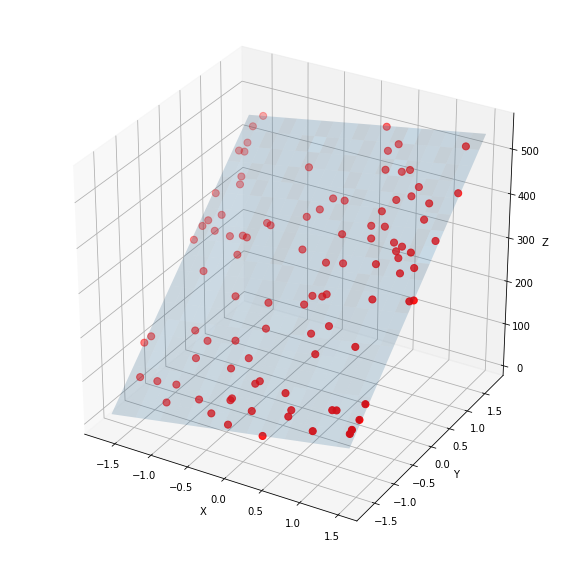

In [13]:
# Aufgabe 6

data = np.c_[X_norm[:, 1], X_norm[:, 2], Y_after]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0]

fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

(-1.8509698155066268, 1.669240948877722, -1.873627302933941, 1.95440967354063)

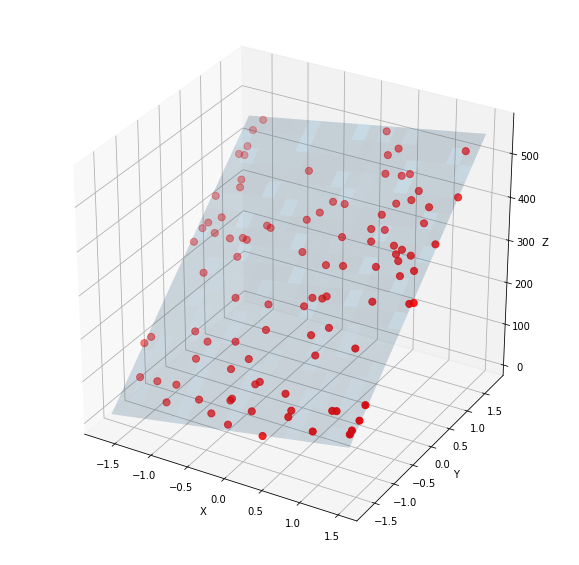

In [14]:
data = np.c_[X_norm[:, 1], X_norm[:, 2], Y_after]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
Z = theta_normal[1]*X + theta_normal[2]*Y + theta_normal[0]

fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')